In [1]:
# # **************** UNCOMMENT AND RUN THIS CELL IF YOU NEED TO INSTALL/ UPGRADE TSAI ****************
stable = True # Set to True for latest pip version or False for main branch in GitHub
!pip install {"tsai -U" if stable else "git+https://github.com/timeseriesAI/tsai.git"} >> /dev/null

# Data prep

In [1]:
import pandas as pd
import numpy as np
from tsai.all import get_ts_dls

# Load the dataset
data = pd.read_csv('/Users/manasdubey2022/Desktop/NGAFID/Codebase/data/NGAFID_MC_C28.csv')

# Define the parameters
bs = 1000  # Batch size
seq_len = 100  # Sequence length
features = ['volt1', 'volt2', 'amp1', 'amp2', 'FQtyL', 'FQtyR', 'E1 FFlow',
            'E1 OilT', 'E1 OilP', 'E1 RPM', 'E1 CHT1', 'E1 CHT2', 'E1 CHT3',
            'E1 CHT4', 'E1 EGT1', 'E1 EGT2', 'E1 EGT3', 'E1 EGT4', 'OAT', 'IAS',
            'VSpd', 'NormAc', 'AltMSL']  # List of features




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/manasdubey2022/anaconda3/envs/ngafid_env/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/manasdubey2022/anaconda3/envs/ngafid_env/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/manasdubey2022/anaconda3/envs/ngafid_env/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/manasdubey2022/anaconda3/envs/ngafid_env/lib/python3.9/site-pa

In [3]:
# Group by 'plane_id' where each plane_id grup is sorted by 'date_diff' without distrubing the original order
grouped = data.groupby('plane_id', sort=False)
# # Initialize lists to store the reshaped data and labels
# X_list = []
# y_list = []

# # Iterate over each group
# for plane_id, group in grouped.groupby('plane_id'):
#     # Drop unnecessary columns and convert to numpy array
#     X = group[features].to_numpy().astype('float32')
#     y = group['before_after'].to_numpy().astype('int64')
    
#     # Calculate the number of sequences
#     num_samples = X.shape[0]
#     num_sequences = num_samples // seq_len
    
#     # Ensure the total number of samples is divisible by seq_len
#     X = X[:num_sequences * seq_len]
#     y = y[:num_sequences * seq_len]
    
#     # Reshape and transpose the data into 3D tensor format [Batch Size, Channels, Sequence Length]
#     X = X.reshape(num_sequences, seq_len, len(features)).transpose(0, 2, 1)
#     y = y.reshape(num_sequences, seq_len)
    
#     # Append to the lists
#     X_list.append(X)
#     y_list.append(y)

# # Concatenate all the sequences
# X_np = np.concatenate(X_list, axis=0)
# y_np = np.concatenate(y_list, axis=0)

# # Verify the shapes and data types
# print("Shape of X_np:", X_np.shape)
# print("Data type of X_np:", X_np.dtype)
# print("Shape of y_np:", y_np.shape)
# print("Data type of y_np:", y_np.dtype)

# # Save the reshaped arrays to .npy files
# np.save('/Users/manasdubey2022/Desktop/NGAFID/Codebase/data/X_reshaped.npy', X_np)
# np.save('/Users/manasdubey2022/Desktop/NGAFID/Codebase/data/y_reshaped.npy', y_np)

# # Load the memmap arrays
# X_memmap = np.memmap('/Users/manasdubey2022/Desktop/NGAFID/Codebase/data/X_reshaped.npy', dtype='float32', mode='r', shape=X_np.shape)
# y_memmap = np.memmap('/Users/manasdubey2022/Desktop/NGAFID/Codebase/data/y_reshaped.npy', dtype='int64', mode='r', shape=y_np.shape)

# # Verify the shapes and data types of the memmap arrays
# print("Shape of X_memmap:", X_memmap.shape)
# print("Data type of X_memmap:", X_memmap.dtype)
# print("Shape of y_memmap:", y_memmap.shape)
# print("Data type of y_memmap:", y_memmap.dtype)

# # Create data loaders using get_ts_dls
# dls = get_ts_dls(X_memmap, y_memmap, drop_last=False, shuffle_train=False, bs=bs)

# print("Data loaders have been created.")

# # Iterate over the data loader to access batches
# for i, (xb, yb) in enumerate(dls.train):
#     print(f"Batch {i+1}:")
#     print("Features shape:", xb.shape)
#     print("Labels shape:", yb.shape)
#     # Print only the first batch for demonstration
#     if i == 0:
#         break

In [4]:
# now each group should be ordered by 'date_diff' without changing the sequences for each group
group_list = [group for _, group in grouped]




In [5]:
group_list[5]

,volt1,volt2,amp1,amp2,FQtyL,FQtyR,E1 FFlow,E1 OilT,E1 OilP,E1 RPM,...,OAT,IAS,VSpd,NormAc,AltMSL,id,plane_id,split,date_diff,before_after
26268,28.0,28.0,9.0,0.3,20.40,20.89,2.01,132.0,59.80,1029.0,...,6.5,0.0,1.23,0.02,835.5,12,55,2,1,0
26269,28.0,28.1,8.9,0.3,20.40,20.88,2.04,132.0,59.72,1027.0,...,6.5,0.0,13.45,0.02,835.5,12,55,2,1,0
26270,28.0,28.1,8.9,0.3,20.40,20.88,1.99,132.0,59.78,1037.0,...,6.2,0.0,1.77,0.01,NaN,12,55,2,1,0
26271,28.0,28.0,8.9,0.3,20.45,20.88,2.00,131.9,59.84,1035.0,...,6.2,0.0,6.05,-0.03,835.0,12,55,2,1,0
26272,28.0,28.1,8.8,0.3,20.45,20.88,2.02,131.9,59.84,1035.0,...,6.2,0.0,0.32,-0.01,835.0,12,55,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28402314,28.1,28.1,3.8,-0.1,15.17,17.72,2.22,156.8,59.47,1169.0,...,15.5,0.0,-15.16,-0.01,840.0,12731,55,2,1,0
28402315,28.1,28.1,3.7,-0.1,15.22,17.95,2.26,156.8,59.50,1173.0,...,15.5,0.0,-12.80,-0.06,840.5,12731,55,2,1,0
28402316,28.1,28.1,3.7,-0.1,15.22,18.10,2.25,156.6,59.56,1170.0,...,15.5,0.0,-39.25,-0.01,840.5,12731,55,2,1,0
28402317,28.1,28.1,3.5,-0.1,15.22,18.10,2.05,156.6,57.84,1085.0,...,15.5,0.0,-75.56,0.01,840.0,12731,55,2,1,0


In [ ]:
# save each plane_id group to a separate file in the 'data/planes_by_id' folder
for i, group in enumerate(group_list):
    group.to_csv(f'/Users/manasdubey2022/Desktop/NGAFID/Codebase/data/planes_by_id/plane_{i}.csv', index=False)



<Axes: title={'center': 'Number of samples in each group grouped by "id"'}>

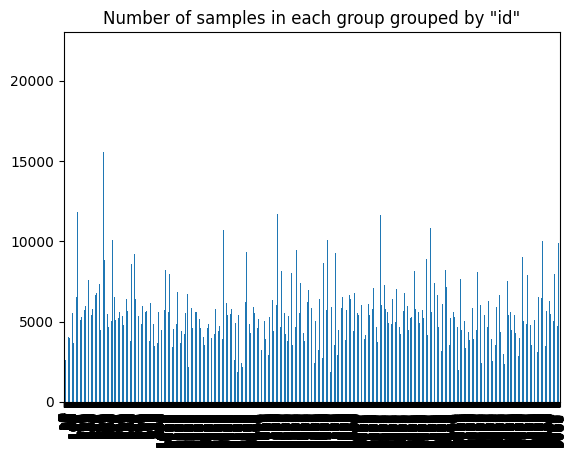

In [7]:
#plot the bar plot of sizes of each group and give a title

group_sizes = [len(group) for group in group_list]
group_sizes = pd.Series(group_sizes)
group_sizes.plot(kind='bar', title='Number of samples in each group grouped by "id"')

In [11]:
# i want to check if each group has a unique plane_id and if the before_after is unique per group
# i.e. if the group has only one plane_id and only one before_after value

# Check if each group has a unique plane_id
plane_ids = [group['plane_id'].unique() for group in group_list]
unique_plane_ids = [len(ids) == 1 for ids in plane_ids]

# Check if each group has a unique before_after value
before_after = [group['before_after'].unique() for group in group_list]
unique_before_after = [len(ids) == 1 for ids in before_after]

# Check if all groups have a unique plane_id and before_after value
all_unique_plane_ids = all(unique_plane_ids)
all_unique_before_after = all(unique_before_after)

print("All groups have a unique plane_id:", all_unique_plane_ids)
print("All groups have a unique before_after value:", all_unique_before_after)

All groups have a unique plane_id: True
All groups have a unique before_after value: True


(5089, 5089)

# TSAI

In [19]:
from tsai.all import *
my_setup()

os              : macOS-15.1-arm64-arm-64bit
python          : 3.9.20
tsai            : 0.3.9
fastai          : 2.7.17
fastcore        : 1.7.12
torch           : 2.2.2
device          : mps
cpu cores       : 8
threads per cpu : 1
RAM             : 8.0 GB
GPU memory      : N/A


In [11]:

bs = 16
c_in = 7  # aka channels, features, variables, dimensions
c_out = 2
seq_len = 15
xb = torch.randn(bs, c_in, seq_len).to(default_device())

# pass it to a dataloader
dl = TSDataLoader(xb, bs=bs)

model =  ROCKET(c_in=c_in, seq_len=seq_len, n_kernels=10, kss=[3, 5, 7])
features = create_rocket_features(dl, model)


ValueError: too many values to unpack (expected 2)

In [17]:
print(batch[0].shape)

torch.Size([100])


In [21]:
c_in = 23
seq_len = 100
model =  ROCKET(c_in=c_in, seq_len=seq_len, n_kernels=10, kss=[3, 5, 7])

In [20]:
features = create_rocket_features(dls.train,model)

RuntimeError: Expected 2D (unbatched) or 3D (batched) input to conv1d, but got input of size: [100]

In [4]:
import numpy as np

# Load the .npy files
X_np = np.load('/Users/manasdubey2022/Desktop/NGAFID/Codebase/data/X.npy')
y_np = np.load('/Users/manasdubey2022/Desktop/NGAFID/Codebase/data/y.npy')

print(X_np.shape, y_np.shape)


# Drop the last 4 columns from X_np after the last column .i.e 
X_np_full = np.hstack((X_np[:, :-4], X_np[:, -1:]))

# Define the parameters
bs = 1000  # Batch size
c_in = X_np_full.shape[1]  # Number of input channels (features) after dropping columns
seq_len = 100  # Sequence length

# Calculate the number of sequences
num_samples = X_np_full.shape[0]
num_sequences = num_samples // seq_len

# Ensure the total number of samples is divisible by seq_len
X_np_full = X_np_full[:num_sequences * seq_len]
# y_np = y_np[:num_sequences * seq_len]

# Reshape and transpose the data into 3D tensor format [Batch Size, Channels, Sequence Length]
X_np_full = X_np_full.reshape(num_sequences, seq_len, c_in).transpose(0, 2, 1)
# y_np = y_np.reshape(num_sequences, seq_len)

# Verify the shapes and data types
print("Shape of X_np:", X_np_full.shape)
print("Data type of X_np:", X_np_full.dtype)
# print("Shape of y_np:", y_np.shape)
# print("Data type of y_np:", y_np.dtype)





(28783265, 27) (28783265,)
Shape of X_np: (287832, 24, 100)
Data type of X_np: float64


In [6]:
X_np_full[0]

array([[ 2.810e+01,  2.810e+01,  2.810e+01, ...,  2.810e+01,  2.810e+01,
         2.810e+01],
       [ 2.810e+01,  2.810e+01,  2.810e+01, ...,  2.810e+01,  2.810e+01,
         2.810e+01],
       [ 6.400e+00,  6.400e+00,  6.400e+00, ...,  4.900e+00,  4.900e+00,
         4.800e+00],
       ...,
       [-3.000e-02, -3.000e-02, -3.000e-02, ..., -1.000e-02,  0.000e+00,
         2.000e-02],
       [ 8.380e+02,  8.380e+02,  8.390e+02, ...,  8.345e+02,  8.345e+02,
         8.345e+02],
       [ 1.000e+00,  1.000e+00,  1.000e+00, ...,  1.000e+00,  1.000e+00,
         1.000e+00]])

In [9]:
print(c_in, seq_len)

22 100


In [28]:
# Check for NaN values in X
nan_in_X = np.isnan(X_np).any()
print("Are there any NaN values in X?", nan_in_X)

# Check for NaN values in y
nan_in_y = np.isnan(y_np).any()
print("Are there any NaN values in y?", nan_in_y)



Are there any NaN values in X? False
Are there any NaN values in y? False


In [30]:
#concatenae the X and y arrays
data = np.concatenate((X_np, y_np[:, :, None]), axis=1)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 100 and the array at index 1 has size 1

In [15]:
import numpy as np
from tsai.all import TSDataset, TSDataLoader

# Load the .npy files
X_np = np.load('/Users/manasdubey2022/Desktop/NGAFID/Codebase/data/X.npy')
y_np = np.load('/Users/manasdubey2022/Desktop/NGAFID/Codebase/data/y.npy')

# Drop the last 4 columns from X_np
X_np = X_np[:, :-4]

# # Define the parameters
# bs = 1000  # Batch size
# c_in = X_np.shape[1]  # Number of input channels (features) after dropping columns
# seq_len = 100  # Sequence length

# # Calculate the number of sequences
# num_samples = X_np.shape[0]
# num_sequences = num_samples // seq_len

# # Ensure the total number of samples is divisible by seq_len
# X_np = X_np[:num_sequences * seq_len]
# y_np = y_np[:num_sequences * seq_len]

# # Reshape and transpose the data into 3D tensor format [Batch Size, Channels, Sequence Length]
# X_np = X_np.reshape(num_sequences, seq_len, c_in).transpose(0, 2, 1)
# y_np = y_np.reshape(num_sequences, seq_len)

# Verify the shapes and data types
print("Shape of X_np:", X_np.shape)
print("Data type of X_np:", X_np.dtype)
print("Shape of y_np:", y_np.shape)
print("Data type of y_np:", y_np.dtype)

# Ensure the data types are compatible with PyTorch tensors
X_np = X_np.astype('float32')
y_np = y_np.astype('int64')



Shape of X_np: (28783265, 23)
Data type of X_np: float64
Shape of y_np: (28783265,)
Data type of y_np: int64


In [17]:
# Create the TSDataset
train_dataset = TSDataset(X_np, y_np)

# Create the TSDataLoader
train_dl = TSDataLoader(train_dataset, bs=bs, shuffle=False, drop_last=False, num_workers=0, verbose=True)

print("Data loader has been created.")

Setting up after_item: Pipeline: 
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: 
Data loader has been created.


In [23]:
train_dl.show_batch()

RuntimeError: could not retrieve buffer from object

In [18]:
print(X_np.shape, y_np.shape)

(287832, 23, 100) (287832, 100)


In [22]:
c_in = 23
seq_len = 1
model =  ROCKET(c_in=c_in, seq_len=seq_len, n_kernels=10, kss=[3, 5, 7])

ValueError: 'a' cannot be empty unless no samples are taken